# 📊 About the Dataset

This dataset contains information about **customers** who purchase clothes online. The store offers **in-store style and clothing advice sessions**.

Customers visit the store, participate in sessions/meetings with a **personal stylist**, and then they can go home and order the clothes they want via a **mobile app** or a **website**.

> **Company's Goal**:  
> The company is trying to decide whether to focus its efforts on the mobile app experience or the website experience.


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [23]:
from encodings.aliases import aliases

aliases_values = set(aliases.values())

for encoding in aliases_values:
    try:
        data = pd.read_csv(r"C:\Users\Anass\OneDrive\Desktop\Ecommerce Customers.csv", encoding = encoding)
        print("Encoder correct c'est : ",encoding)
    except:
        pass

Encoder correct c'est :  iso2022_jp
Encoder correct c'est :  iso8859_3
Encoder correct c'est :  iso8859_15
Encoder correct c'est :  iso2022_jp_1
Encoder correct c'est :  hp_roman8
Encoder correct c'est :  cp932
Encoder correct c'est :  cp862
Encoder correct c'est :  iso8859_11
Encoder correct c'est :  iso8859_6
Encoder correct c'est :  cp855
Encoder correct c'est :  cp500
Encoder correct c'est :  cp1254
Encoder correct c'est :  euc_jp
Encoder correct c'est :  utf_7
Encoder correct c'est :  ascii
Encoder correct c'est :  big5hkscs
Encoder correct c'est :  cp1256
Encoder correct c'est :  mac_greek
Encoder correct c'est :  mbcs
Encoder correct c'est :  iso8859_9
Encoder correct c'est :  cp865
Encoder correct c'est :  iso8859_2
Encoder correct c'est :  gb18030
Encoder correct c'est :  iso2022_jp_3
Encoder correct c'est :  iso8859_5
Encoder correct c'est :  hz
Encoder correct c'est :  johab
Encoder correct c'est :  cp1252
Encoder correct c'est :  cp437
Encoder correct c'est :  koi8_r
Encode

In [24]:
data = pd.read_csv(r'C:\Users\Anass\OneDrive\Desktop\Ecommerce Customers.csv')

In [25]:
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [26]:
data.shape

(500, 8)

In [27]:
data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


### Variables and Interpretations

1. **Avg. Session Length**
    * **Mean**: 33.05 minutes
    * **Std**: 0.99 minutes
    * **Min**: 29.53 minutes
    * **25%**: 32.34 minutes
    * **50%**: 33.08 minutes
    * **75%**: 33.71 minutes
    * **Max**: 36.14 minutes

    **Interpretation**: The average session length is around 33 minutes. The low variability around this mean indicates that the session durations are relatively stable. The minimum and maximum values show slight variability, but overall, clients spend a fairly consistent amount of time in each session.

2. **Time on App**
    * **Mean**: 12.05 minutes
    * **Std**: 0.99 minutes
    * **Min**: 8.51 minutes
    * **25%**: 11.39 minutes
    * **50%**: 11.98 minutes
    * **75%**: 12.75 minutes
    * **Max**: 15.13 minutes

    **Interpretation**: On average, clients spend about 12 minutes on the mobile app. Similar to session length, the time spent on the app is quite consistent with low variability. Clients typically spend between 8.5 and 15 minutes on the app.

3. **Time on Website**
    * **Mean**: 37.06 minutes
    * **Std**: 1.01 minutes
    * **Min**: 33.91 minutes
    * **25%**: 36.35 minutes
    * **50%**: 37.07 minutes
    * **75%**: 37.72 minutes
    * **Max**: 40.01 minutes

    **Interpretation**: Clients spend an average of 37 minutes on the website, which is significantly longer than the time spent on the mobile app. The low variability suggests that clients spend a relatively uniform amount of time on the website.

4. **Length of Membership**
    * **Mean**: 3.53 years
    * **Std**: 0.99 years
    * **Min**: 0.27 years
    * **25%**: 2.93 years
    * **50%**: 3.53 years
    * **75%**: 4.13 years
    * **Max**: 6.92 years

    **Interpretation**: The average membership length is about 3.5 years, with some variability. Clients have generally been members for between 0.3 and 7 years. The data show that most clients have been members for several years.

5. **Yearly Amount Spent**
    * **Mean**: 499.31 USD
    * **Std**: 79.31 USD
    * **Min**: 256.67 USD
    * **25%**: 445.04 USD
    * **50%**: 498.89 USD
    * **75%**: 549.31 USD
    * **Max**: 765.52 USD

    **Interpretation**: Clients spend an average of about 499 USD per year, with some variability. Annual spending ranges from 256 USD to 765 USD. Most clients spend between 445 USD and 549 USD per year.


In [28]:
data.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [29]:
data.groupby(data.duplicated()).size()

False    500
dtype: int64

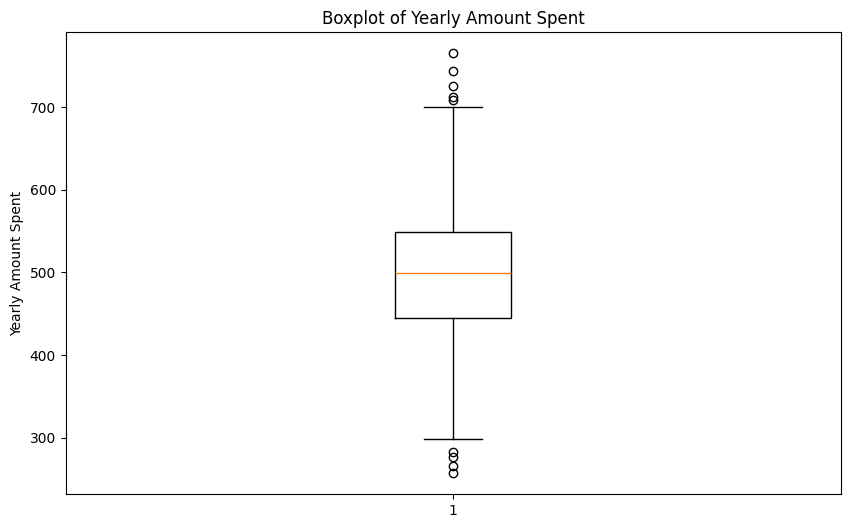

In [30]:
plt.figure(figsize=(10, 6))
plt.boxplot(data['Yearly Amount Spent'])
plt.title('Boxplot of Yearly Amount Spent')
plt.ylabel('Yearly Amount Spent')
plt.show()


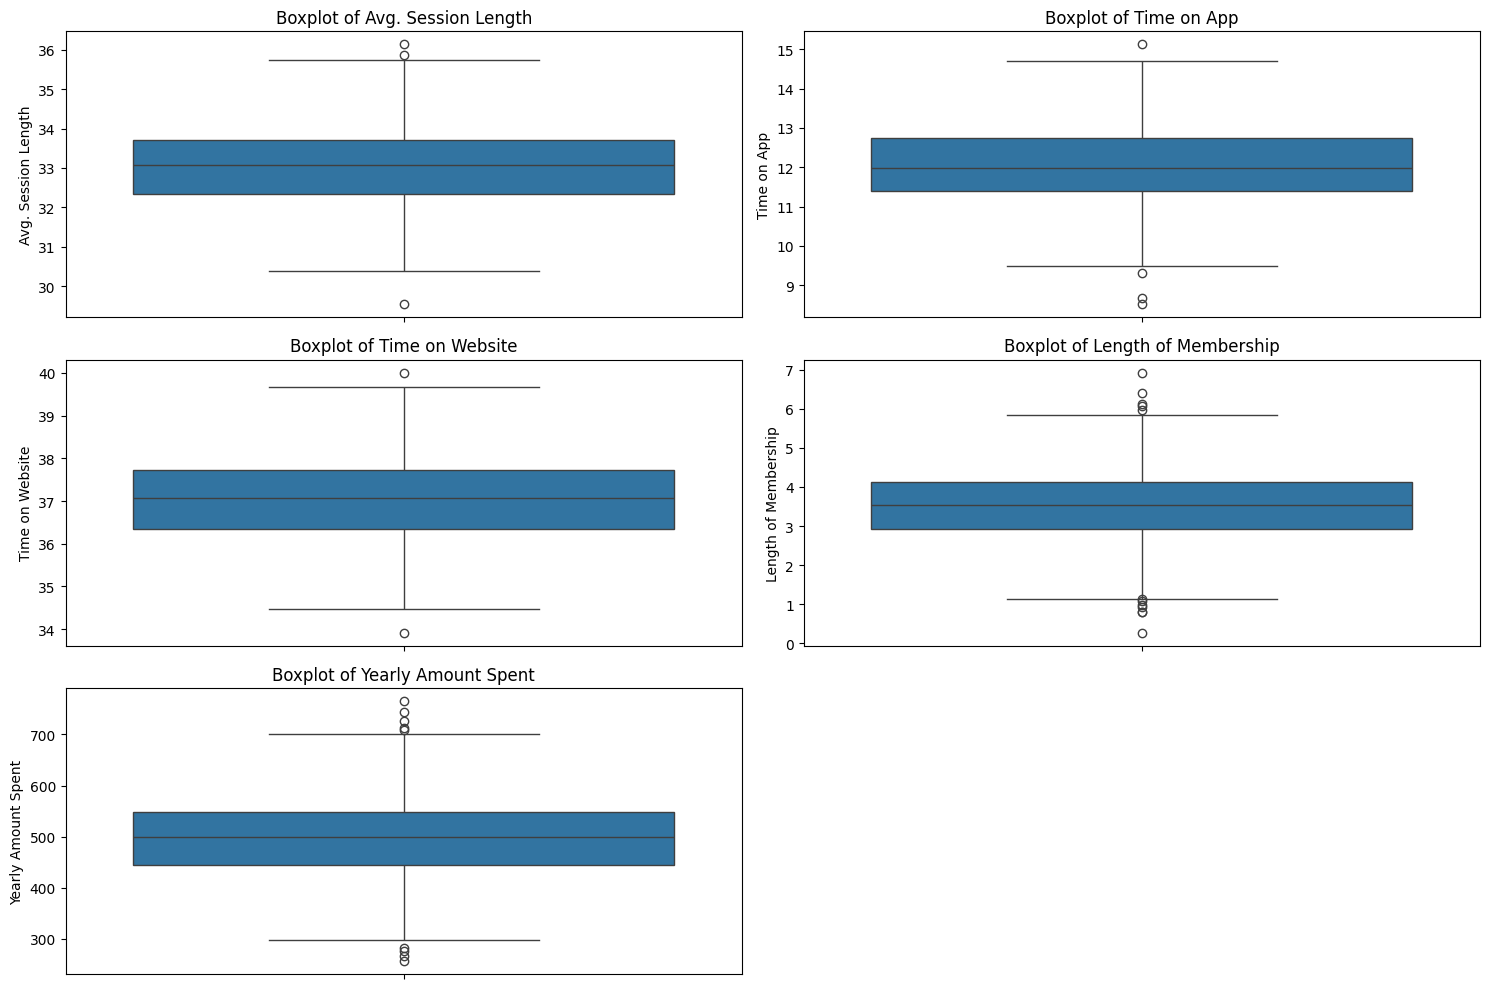

In [31]:
# Tracer un boxplot pour chaque colonne
import seaborn as sns
# Liste des colonnes à vérifier pour les valeurs aberrantes
colonnes = ['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership', 'Yearly Amount Spent']

# Tracer un boxplot pour chaque colonne
plt.figure(figsize=(15, 10))
for i, colonne in enumerate(colonnes, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(y=data[colonne])
    plt.title(f'Boxplot of {colonne}')
    plt.ylabel(colonne)

plt.tight_layout()
plt.show()

In [32]:
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [33]:
X = data.drop(['Email','Address','Avatar','Yearly Amount Spent'], axis=1)
y = data['Yearly Amount Spent']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=41, test_size=0.3)


In [34]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [35]:
model.coef_

array([25.34068047, 37.97787035,  0.36158493, 61.17044242])

In [36]:
A = data.drop(['Email', 'Address', 'Avatar'],axis=1)
print(A.corr())
del A

                      Avg. Session Length  Time on App  Time on Website  \
Avg. Session Length              1.000000    -0.027826        -0.034987   
Time on App                     -0.027826     1.000000         0.082388   
Time on Website                 -0.034987     0.082388         1.000000   
Length of Membership             0.060247     0.029143        -0.047582   
Yearly Amount Spent              0.355088     0.499328        -0.002641   

                      Length of Membership  Yearly Amount Spent  
Avg. Session Length               0.060247             0.355088  
Time on App                       0.029143             0.499328  
Time on Website                  -0.047582            -0.002641  
Length of Membership              1.000000             0.809084  
Yearly Amount Spent               0.809084             1.000000  


Time on Website has the minimum value in the regression coefficient, and after checking the correlation matrix, we can see that it has a correlation value of -0.002641 with the target value.


In [37]:
prediction = model.predict(X_test)

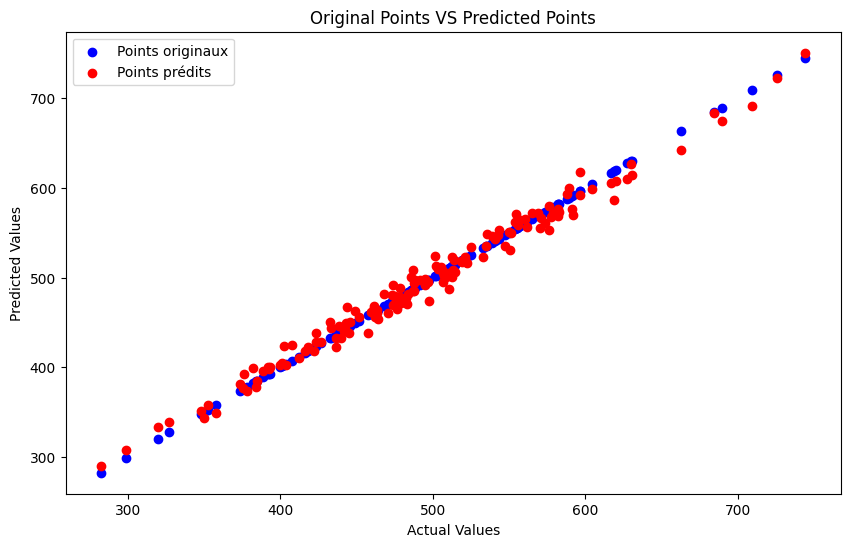

In [38]:
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_test, color='blue', label='Points originaux')

plt.scatter(y_test, prediction, color='red', label='Points prédits')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Original Points VS Predicted Points')
plt.legend()

plt.show()

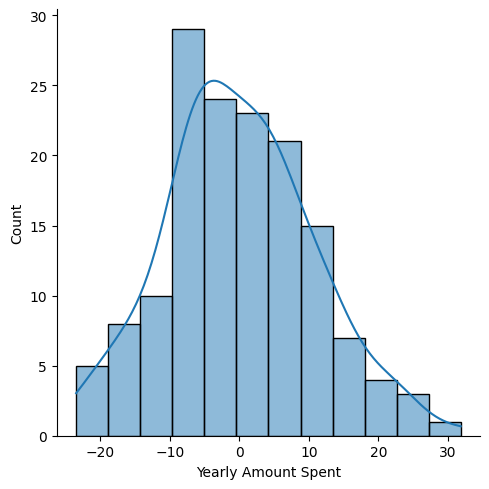

In [39]:
residuals = y_test - prediction
sns.displot(residuals,kde=True)

- **No Significant Bias Observed**  
  The distribution of residuals is roughly normal and centered around zero, indicating no significant bias in the model. This suggests that the model's errors are random and evenly distributed, which is a positive sign of its performance.


In [40]:
mse = mean_squared_error(y_test, prediction)
mae = mean_absolute_error(y_test, prediction)
r2 = r2_score(y_test, prediction)

print(f"Mean Squared Error of X_test is {mse}")
print(f"Mean Absolute Error of X_test is {mae}")
print(f"R^2 Score of X_test is {r2}")

Mean Squared Error of X_test is 110.89877778149048
Mean Absolute Error of X_test is 8.421863155694
R^2 Score of X_test is 0.984440475378756


- **Mean Squared Error (MSE): 110.90**  
  The average squared error between the predicted and actual values is 110.90. Lower MSE indicates better performance, so this value suggests the model has some room for improvement.

- **Mean Absolute Error (MAE): 8.42**  
  On average, the model's predictions deviate from the actual values by 8.42 units. This relatively low MAE indicates that the model's predictions are fairly accurate.

- **R^2 Score: 0.98**  
  The model explains 98% of the variance in the target variable, demonstrating a very high level of performance. This score suggests that the model fits the data extremely well.
